In [1]:
import pandas as pd
import numpy as np

In [2]:
dct = {
    "t" : [0,3,6,9,12],
    "P" : [3500,3000,2500,2000,1500],
    "Gp": [0,218,461,725,1000]
}
df = pd.DataFrame(dct)

In [3]:
GamG = 0.75
T = 210 + 460 #(F)+460, Rankine
P = np.asarray(df["P"],dtype=int)

In [4]:
Ppc = 709.604 - 58.718*GamG
Tpc = 170.491 + 307.344*GamG
Ppc,Tpc

(665.5655, 400.999)

In [5]:
#Z Correlation
Tpr = T/Tpc
Ppr = P/Ppc
Az = 1.39*(Tpr-0.92)**0.5-0.36*Tpr-0.1
Cz = 0.132 - 0.32*np.log10(Tpr)
Ez = 9*(Tpr-1)
Fz = 0.3106 - 0.49*Tpr+0.1824*Tpr**2
Dz = 10**Fz
Bz = (0.62-0.23*Tpr)*Ppr +(0.066/(Tpr-0.86)-0.037)*Ppr**2+0.32*Ppr**6/10**Ez

zCorr = Az + (1-Az)/np.exp(Bz) + Cz * Ppr**Dz
zCorr

array([0.86517769, 0.84694153, 0.84107974, 0.84963918, 0.87314565])

In [6]:
zCorr

array([0.86517769, 0.84694153, 0.84107974, 0.84963918, 0.87314565])

In [7]:
dct_result = {
    "p" : P,
    "z" : zCorr,
    "p/z" : P/zCorr,
    "Gp" : df["Gp"]
}
df_res = pd.DataFrame(dct_result)
df_res

,p,z,p/z,Gp
0,3500,0.865178,4045.411755,0
1,3000,0.846942,3542.157151,218
2,2500,0.841080,2972.369791,461
3,2000,0.849639,2353.940420,725
4,1500,0.873146,1717.926452,1000


In [8]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
X = df_res.iloc[:, 3].values.reshape(-1, 1) #Gp
Y = df_res.iloc[:, 2].values.reshape(-1, 1) #p/z
lin_reg = LinearRegression()
model = lin_reg.fit(X,Y)
Y_pred = lin_reg.predict(X)

In [10]:
r_sq = model.score(X,Y_pred)
intercept,coef = model.intercept_[0],model.coef_[0][0]
intercept,coef

(4046.998931345052, -2.3307774911084485)

In [11]:
X_0 = -intercept/coef
X_500 = (500-intercept)/coef
RF = X_500/X_0
X_0,X_500,RF

(1736.3300215416186, 1521.8093296663014, 0.8764516599875104)

In [12]:
X_ = np.arange(0,1738,4).reshape(-1,1)
Y_ = lin_reg.predict(X_)

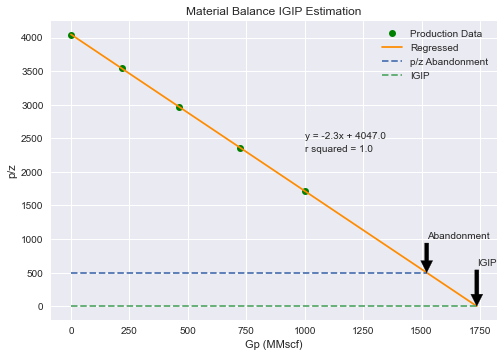

In [13]:
plt.style.use('seaborn')
plt.plot(df_res["Gp"],df_res["p/z"],'go',label="Production Data")
plt.plot(X_,Y_,color="darkorange",label="Regressed")
plt.plot([0,X_500],[500,500],"--",label="p/z Abandonment")
plt.plot([0,X_0],[0,0],"--",label="IGIP")
plt.annotate('IGIP', xy=(X_0, 0), xytext=(X_0, 600),
            arrowprops=dict(facecolor='black'))
plt.annotate('Abandonment', xy=(X_500, 500), xytext=(X_500, 1000),
            arrowprops=dict(facecolor='black'))
plt.annotate('y = '+str(round(coef,1))+'x + '+str(round(intercept,1)),xy=(0,0),xytext=(1000,2500))
plt.annotate('r squared = '+str(round(r_sq,2)),xy=(0,0),xytext=(1000,2300))
plt.xlabel("Gp (MMscf)")
plt.ylabel("p/z")
plt.title("Material Balance IGIP Estimation")
plt.legend()
plt.show()

In [14]:
df_res.to_excel("IGIP.xlsx",index=False)